In [1]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
import os

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
path=f'volume'

In [7]:
slices = [pydicom.dcmread(os.path.join(path, f)) for f in os.listdir(path)]


In [8]:
# how many slices do we have?
len(slices)

24

In [9]:
# let's take a look at the metadata
print(slices[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.972281369541513869905744267501
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '19910702'
(0008, 0013) Instance Creation Time              TM: '085750.546000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0

In [13]:
# lets check the dicome key dimensions
print(f'Pixel Spacing: {slices[0].PixelSpacing}')
print(f'Slice Thickness: {slices[0].SliceThickness}mm')

Pixel Spacing: [0.6875, 0.6875]
Slice Thickness: 5mm


In [14]:
# lets extract the volume from the data
image_data = np.stack([s.pixel_array for s in slices])

In [16]:
# what is the shape of the volume
image_data.shape

(24, 320, 260)

In [17]:
# what is the data type
image_data.dtype

dtype('uint16')

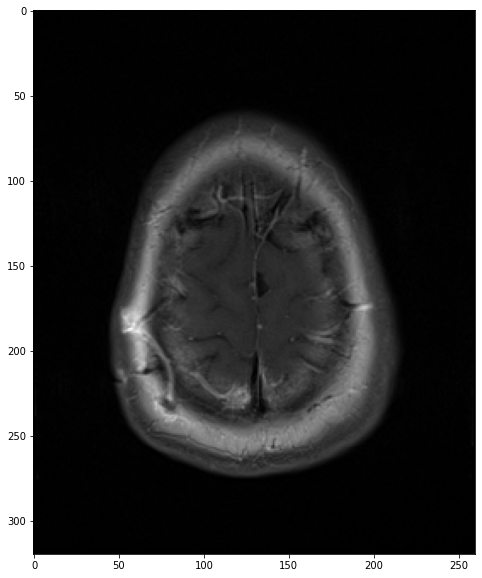

In [19]:
# lets visualize a slice
img=image_data[15,:,:]
plt.imshow(img, cmap="gray")